# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [ ]:
https://necromuralist.github.io/data_science/posts/evaluating-a-model/
https://necromuralist.github.io/data_science/

In [1]:
import numpy as np
import pandas as pd

In [2]:
############ should be removed in submition
import os
os.chdir('E:\\Documents\\Coursera\\Applied Machine Learning in Python\\AMLP W3')
############ should be removed in submition

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [ ]:
def answer_one():
    
    # Your code here
    
    return # Return your answer


In [3]:
# Question 1: This function calculates the percentage of the observations in the dataset that are instances of fraud
# This function returns a float between 0 and 1.

# load csv file 'fraud_data.csv'
df = pd.read_csv('fraud_data.csv', encoding = 'utf-8', header = 0 )

# Build the feature space and the lable space
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


# The instances of fraud
no_frauds = y.where(y == True)

# no_frauds.count()
# 356

# y.count()
# 21693

fraud_percentage = no_frauds.count() / y.count()
# fraud_percentage
# 0.016410823768035772

# type(fraud_percentage)
# numpy.float64

####################  second equvalent option ###################

# count the instances in y according to bins
y_bincount = np.bincount(y)
# array([21337,   356], dtype=int64)
fraud_percentage2 = y_bincount[1] / y_bincount[0]
fraud_percentage2
# 0.016684632328818484



0.016684632328818484

In [ ]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [ ]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    
    return # Return your answer

In [6]:
# Question 2: This function train a dummy classifier that classifies everything as the majority class of the training data.
# This function returns a tuple with two floats, i.e. (accuracy score, recall score).

# scikit-learn makes it easy to create a dummy classifier just by using the DummyClassifier class 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

# read the fraud_data.csv file 
df = pd.read_csv('fraud_data.csv')

# Build the feature space and the lable space
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# The DummyClassifier is used just like a regular classifier. 
# So to prepare it for prediction, we call the fit method on the x_train and y_train variables 
# that hold the training set instances and labels. 


# Negative class (0) is most frequent, hence the majority class
# So here, we set this to the most frequent strategy to predict the most frequent class. 

# this DummyClassifier won't actually be looking at the individual data instances of those variables. 
# But it does use the y_train variable to determine which class in the training data is most frequent.
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier almost always predicts class 0
# just like a regular classifier, we can call the predict method to make predictions on the test set. 
y_dummy_predictions = dummy_majority.predict(X_test)

# Let's see the dummy predictions 
# y_dummy_predictions
# array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
# And as promised, you can see it's always predicting 0 or the negative class for every instance in the test set. 

# accuracy_score(y_test, y_dummy_predictions)
# 0.98525073746312686
# type(accuracy_score(y_test, y_dummy_predictions))
# numpy.float64

# recall_score(y_test, y_dummy_predictions)
# 0.0
# type(recall_score(y_test, y_dummy_predictions))
# numpy.float64

accuracy_recall = (accuracy_score(y_test, y_dummy_predictions), recall_score(y_test, y_dummy_predictions))
# accuracy_recall
# (0.98525073746312686, 0.0)


### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [ ]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    
    return # Return your answer

In [30]:
# Question 3: This function train a SVC classifer using the default parameters.
# This function returns a tuple with three floats, i.e. (accuracy score, recall score, precision score).

# import from scikit-learn SV classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

# read the fraud_data.csv file 
df = pd.read_csv('fraud_data.csv')

# Build the feature space and the lable space
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

# train a support vector machine classifier with the default parameters. 
svm = SVC().fit(X_train, y_train)
# get the prediction of the support vector machine classifier 
svm_predicted = svm.predict(X_test)

# accuracy_score(y_test, svm_predicted)
# 0.98525073746312686
# type(accuracy_score(y_test, svm_predicted))
# numpy.float64

# recall_score(y_test, svm_predicted)
# 0.0
# type(recall_score(y_test,svm_predicted))
# numpy.float64

# precision_score(y_test, svm_predicted
# 1.0
# type(precision_score(y_test, svm_predicted))
# numpy.float64

accuracy_recall_precision = (accuracy_score(y_test, svm_predicted), recall_score(y_test, svm_predicted), 
                             precision_score(y_test, svm_predicted))
# accuracy_recall_precision
# (0.99078171091445433, 0.375, 1.0)

# type(precision_score(y_test, svm_predicted))
# numpy.float64

numpy.float64

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [ ]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    
    return # Return your answer

In [10]:
# Question 4: This function train a SVC classifer with parameters {'C': 1e9, 'gamma': 1e-07}, 
# using a threshold of -220 on the decision function.
# This function returns a confusion matrix, a 2x2 numpy array with 4 integers.

# import from scikit-learn SV classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import binarize


# read the fraud_data.csv file 
df = pd.read_csv('fraud_data.csv')

# Build the feature space and the lable space
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

# train a support vector machine classifier with the wanted parameters {'C': 1e9, 'gamma': 1e-07}. 
svm = SVC(gamma=1e-07, C=1e9).fit(X_train, y_train)
# When given a set of test points, the decision_function method provides for each one a classifier score value that indicates 
# how confidently classifier predicts the positive class, so there will be large magnitude positive scores for those points, 
# or it predicts a negative class, 
# there'll be large magnitude negative scores for negative points.
#y_scores_svm = svm.decision_function(X_test) > -220



y_scores_svm = svm.decision_function(X_test)
# Let's see an example of the 20 first instances
#y_score_list = list(zip(y_test[0:20], y_scores_svm[0:20]))
#y_score_list

# the wanted threshold
threshold = -200

# change the score acording to the threshold
y_scores_svm[y_scores_svm > threshold] = 1
y_scores_svm[y_scores_svm != 1] = 0


# change the threshold
# it will return 1 for all values above -200 and 0 otherwise
# results are 2D so we slice out the first column
###########y_pred_threshold = binarize(y_scores_svm, -200)[0]       #  something is wrong with this code and I don't know what
########### https://stackoverflow.com/questions/35082140/preprocessing-in-scikit-learn-single-sample-depreciation-warning
#y_pred_threshold_vector = y_pred_threshold.reshape(1, -1)
#y_pred_threshold_vector[0][0:20]
#y_pred_threshold[0:20]

# Let's see an example of the 20 first instances
# y_list_threshold = list(zip(y_pred_threshold[0:20], y_scores_svm[0:20]))
# y_list_threshold
# [(0.0, -739.71796843138691),
#  (0.0, -1086.1679483327007),
#  (0.0, -696.46339735117908),
#  (0.0, -841.73039659586902),
#  (0.0, -1080.4118493470287),
#  (0.0, -611.77292677489277),
#  (0.0, -959.80857082930561),
#  (0.0, -600.12006196108814),
#  (0.0, -584.29804298010822),
#  (0.0, -454.94339891997333),
#  (0.0, -720.85963520136829),
#  (0.0, -683.91564640131946),
#  (0.0, -547.24480983344074),
#  (0.0, -496.40787121382709),
#  (0.0, -906.90968748656269),
#  (0.0, -744.87826296416279),
#  (0.0, -856.26987585154529),
#  (1.0, -173.23688158122059),
#  (0.0, -667.16959616271015),
#  (0.0, -808.74145647612568)]


#predicted = cls.decision_function(X_test) > -220



# get the confusion matrix for the current threshold
confusion_mc = confusion_matrix(y_test, y_scores_svm)
confusion_mc
# array([[5324,   20],
#        [  14,   66]])



array([[5324,   20],
       [  14,   66]])

In [ ]:
[(0, -739.71796843138691),
 (0, -1086.1679483327007),
 (0, -696.46339735117908),
 (0, -841.73039659586902),
 (0, -1080.4118493470287),
 (0, -611.77292677489277),
 (0, -959.80857082930561),
 (0, -600.12006196108814),
 (0, -584.29804298010822),
 (0, -454.94339891997333),
 (0, -720.85963520136829),
 (0, -683.91564640131946),
 (0, -547.24480983344074),
 (0, -496.40787121382709),
 (0, -906.90968748656269),
 (0, -744.87826296416279),
 (0, -856.26987585154529),
 (0, -173.23688158122059),
 (0, -667.16959616271015),
 (0, -808.74145647612568)]

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [ ]:
def answer_five():
        
    # Your code here
    
    return # Return your answer

<IPython.core.display.Javascript object>


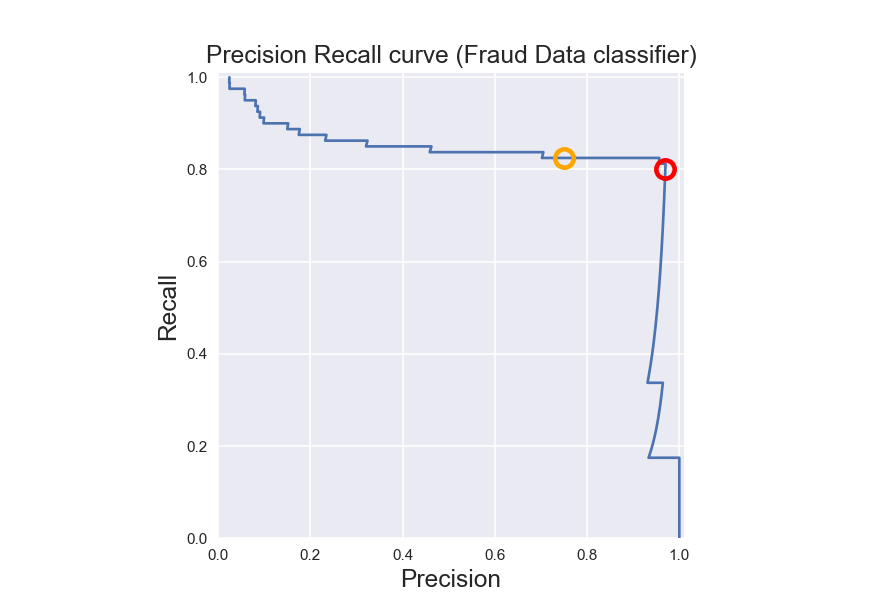

Recall at precision 0.75: 0.825


<IPython.core.display.Javascript object>


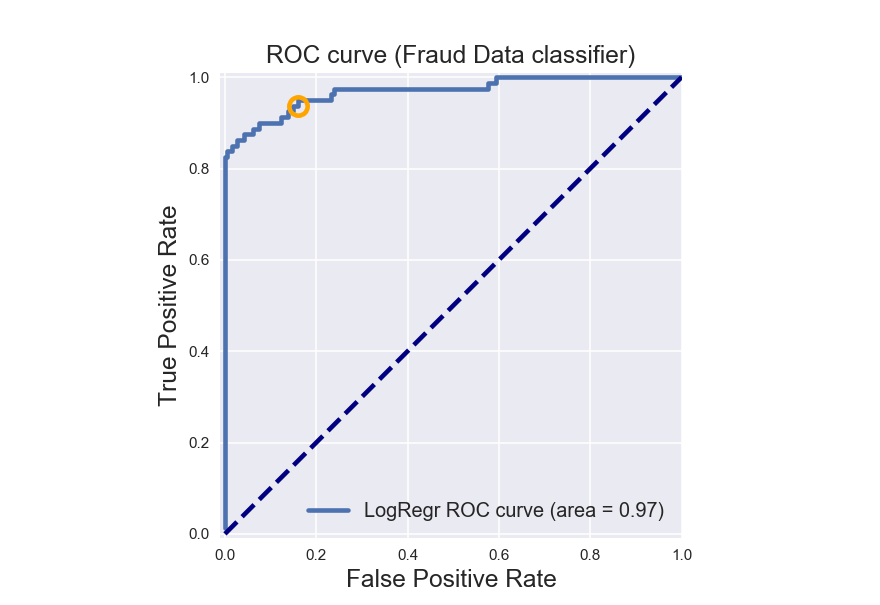

True positive rate at False positive rate 0.16: 0.9375


(0.82499999999999996, 0.9375)

In [31]:
# Question 5: This function train a logisitic regression classifier with default parameters using X_train and y_train, 
# This function returns a tuple with two floats, i.e. (recall, true positive rate).
# where (recall = what is the recall when the precision is 0.75, TP rate = what is the TP rate when the FP rate is 0.16)

# import from scikit-learn SV classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

%matplotlib notebook
# import numpy as np   # already imported
# import pandas as pd  # already imported
import seaborn as sns
import matplotlib.pyplot as plt



# read the fraud_data.csv file 
df = pd.read_csv('fraud_data.csv')

# Build the feature space and the lable space
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

# train a LogisticRegression classifier with with default parameters. 
lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)


precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
# calculate the recall when the precision is given to be 0.75
index_pre = np.where(precision==0.75)[0][0]
recall_at_precision = recall[index_pre]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
# The red circle indicates the precision and recall that's achieved when the decision threshold is zero. 
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
given_precision = 0.75
plt.plot(given_precision, recall_at_precision, 'o', markersize = 12, fillstyle = 'none', c='orange', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision Recall curve (Fraud Data classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

print("Recall at precision 0.75: {0}".format(recall_at_precision))

# receiver operating characteristic curves are a very widely used visualization method that illustrate the performance 
# of a binary classifier
# The ideal point in ROC space is one where the classifier achieves a false positive rate of zero, 
# and a true positive rate of one. So that would be the upper left corner. 
# So curves in ROC space represent different tradeoffs as, the decision threshold is varied for the classifier. 
# So just as in the precision recall case, as we vary decision threshold, 
# we'll get different numbers of false positives and true positives that we can plot on a chart.

# So, the shape of the curve can be important as well, the steepness of the curve, 
# we want classifiers that maximize the true positive rate while minimizing the false positive rate. 

# we can qualify the quality of a classifier in some sense by looking at how much area there is underneath the curve. 



# calculate the true positive rate and the false positive rate as we vary decision threshold 
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# calculate the true positive rate when the false positive rate is given to be 0.16
index_fpr = np.where(np.round(fpr_lr, 2)==0.16)[0][0]
tpr_at_fpr = tpr_lr[index_fpr]
# false positive rate is 0.16

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Fraud Data classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
# The dotted line here that I'm showing is the classifier curve that secretly results from a classifier
# that randomly guesses the label for a binary class. 
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
given_fpr = 0.16
plt.plot(given_fpr, tpr_at_fpr, 'o', markersize = 12, fillstyle = 'none', c='orange', mew=3)
plt.axes().set_aspect('equal')
plt.show()

print("True positive rate at False positive rate 0.16: {0}".format(tpr_at_fpr))

# The function returns a tuple with two floats, i.e. (recall, true positive rate).
recall_tpr = (recall_at_precision, tpr_at_fpr)
recall_tpr
# (0.82499999999999996, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [ ]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    
    return # Return your answer

<IPython.core.display.Javascript object>


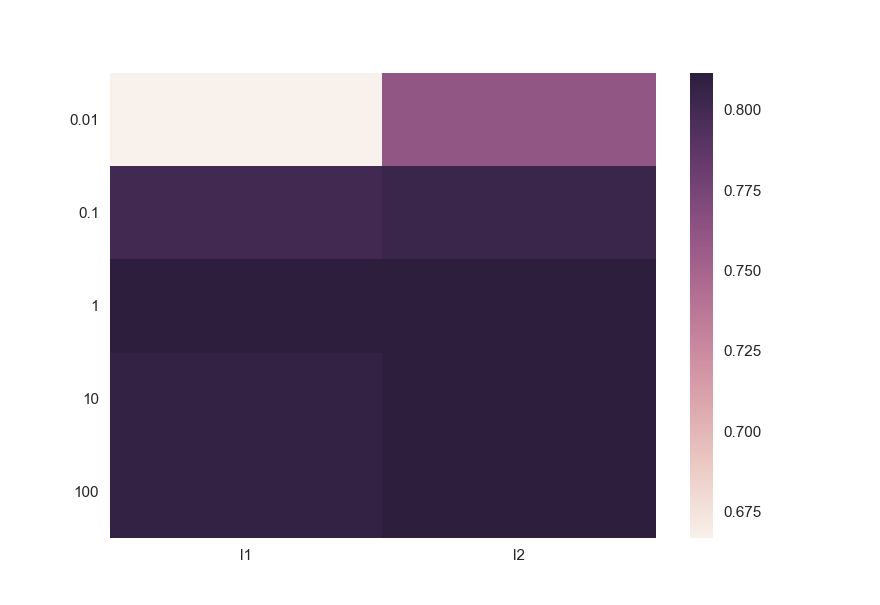

In [68]:
# Question 6: This function train a logisitic regression classifier and perform a grid search over the parameters listed below, 
# using recall for scoring and the default 3-fold cross validation.
# 'penalty': ['l1', 'l2']
# 'C':[0.01, 0.1, 1, 10, 100]
# This function returns a 5 by 2 numpy array with 10 floats.
# the numpy array is achieved from .cv_results_, by creating an array of the mean test scores of each parameter combination.

# import from scikit-learn SV classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score              # we will use recall for scoring
from sklearn.model_selection import cross_val_score   # we will use default 3-fold cross validation


%matplotlib notebook
# import numpy as np   # already imported
# import pandas as pd  # already imported
import seaborn as sns
import matplotlib.pyplot as plt



# read the fraud_data.csv file 
df = pd.read_csv('fraud_data.csv')

# Build the feature space and the lable space
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

# choose the classifier to be logisitic regression
clf = LogisticRegression()
# make the grid
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}


# used metric to optimize over grid parameters: recall and the 3-fold cross validation (cv = 3)
grid_clf_recall = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall', cv = 3)
grid_clf_recall.fit(X_train, y_train)
y_decision_fn_scores_recall = grid_clf_recall.predict(X_test) 

# print('Test set recall: ', recall_score(y_test, y_decision_fn_scores_recall, average='weighted'))
# print('Grid best parameter (max. recall): ', grid_clf_recall.best_params_)
# print('Grid best score (recall): ', grid_clf_recall.best_score_)


# print the recall test score for each parameter the grid checked
# mean_test_score = grid_clf_recall.cv_results_['mean_test_score']
# for mean, params in zip(mean_test_score, grid_clf_recall.cv_results_['params']):
#     print("%0.3f  for %r" % (mean, params))
# Test set recall:  0.996681415929
# Grid best parameter (max. recall):  {'C': 10, 'penalty': 'l2'}
# Grid best score (recall):  0.811594202899
# 0.667  for {'C': 0.01, 'penalty': 'l1'}
# 0.761  for {'C': 0.01, 'penalty': 'l2'}
# 0.801  for {'C': 0.1, 'penalty': 'l1'}
# 0.804  for {'C': 0.1, 'penalty': 'l2'}
# 0.812  for {'C': 1, 'penalty': 'l1'}
# 0.812  for {'C': 1, 'penalty': 'l2'}
# 0.808  for {'C': 10, 'penalty': 'l1'}
# 0.812  for {'C': 10, 'penalty': 'l2'}
# 0.808  for {'C': 100, 'penalty': 'l1'}
# 0.812  for {'C': 100, 'penalty': 'l2'}

# create an empty floats numpy array for the recall test score for each parameter the grid checked
grid_results = np.empty([1, 10], dtype=float)

# filling the array with the mean recall test scores of each parameter combination
mean_test_score = grid_clf_recall.cv_results_['mean_test_score']
for i, mean in zip(range(0, grid_results.size), mean_test_score):
    grid_results[0][i] = mean
# set the array in wanted size
grid_results = np.reshape(grid_results, (5, 2))
# grid_results
# array([[ 0.66666667,  0.76086957],
#        [ 0.80072464,  0.80434783],
#        [ 0.8115942 ,  0.8115942 ],
#        [ 0.80797101,  0.8115942 ],
#        [ 0.80797101,  0.80797101]])

# visualize the results from the grid search
plt.figure()
sns.heatmap(grid_results.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
plt.yticks(rotation=0);


In [63]:
grid_results = np.empty([1, 10], dtype=float)
#grid_results[0][0]
print('before', grid_results)
#grid_results = np.reshape(grid_results, (5, 2))
grid_results[0][3]

before [[ 0.66666667  0.76086957  0.80072464  0.80434783  0.8115942   0.8115942
   0.80797101  0.8115942   0.80797101  0.8115942 ]]


0.80434782608695654

In [ ]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())